<a href="https://colab.research.google.com/github/rafaeldajuda/IA-COLAB/blob/main/REGRESS%C3%83O_LINEAR_SIMPLES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESSÃO LINEAR SIMPLES - SORVETE

Prevendo vendas de sorvetes com base na temperatuara.

In [5]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Importando dados
dados = pd.read_excel('Sorvete.xlsx')
dados.head()

,Temperatura,Vendas_Sorvetes
0,26,268.125258
1,39,403.562400
2,34,339.279899
3,30,310.035329
4,27,273.616360


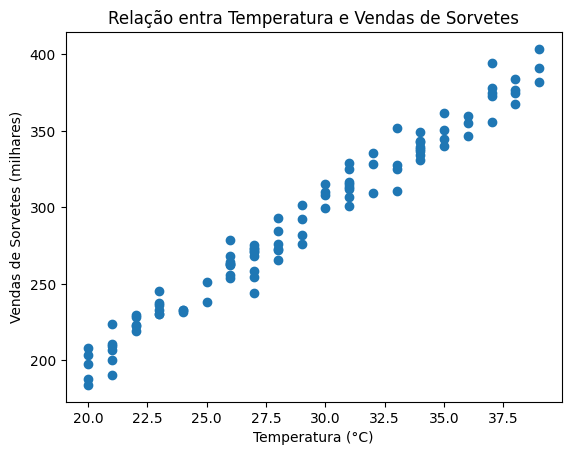

In [6]:
# Visualizando os dados
plt.scatter(dados['Temperatura'], dados['Vendas_Sorvetes'])
plt.xlabel('Temperatura (°C)')
plt.ylabel('Vendas de Sorvetes (milhares)')
plt.title('Relação entra Temperatura e Vendas de Sorvetes')
plt.show()

In [9]:
# correlçao entre dados
# Quanto mais próxima de 1 mais forte a correlação
# As vendas de sorvete estão fortemente ligados a temperatura
dados.corr()

,Temperatura,Vendas_Sorvetes
Temperatura,1.000000,0.985589
Vendas_Sorvetes,0.985589,1.000000


## Modelo de Regressão Linear

In [10]:
# Dividindo os dados em conjuntos de treinamento e teste
x = dados[['Temperatura']] # Recurso (variável independente)
y = dados['Vendas_Sorvetes'] # Rótulo (variável dependente)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(80, 1)

In [12]:
X_test.shape

(20, 1)

In [14]:
# Criando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões no conjunot de teste
previsoes =  modelo.predict(X_test)

## Avaliando os Resultados

Erro Médio Quadrático: 101.64524989805876
Erro Absoluto Médio: 7.6809927436910055
R² (Coeficiente de determinação): 0.9594169633031285


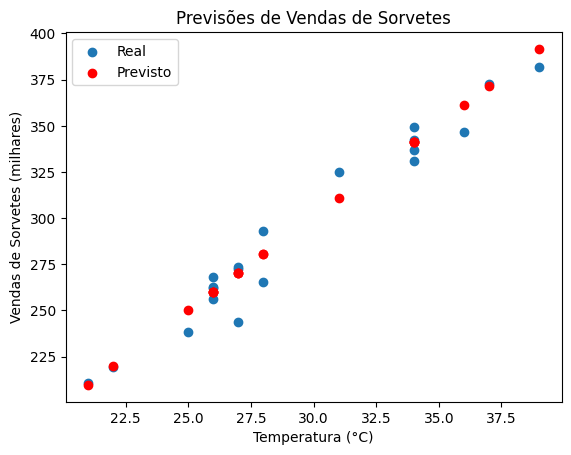

In [15]:
# Avaliando o desempenho do modelo
erro_medio_quadratico = mean_squared_error(y_test, previsoes)
erro_absoluto_medio = mean_absolute_error(y_test, previsoes)
r_quadrado = r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (Coeficiente de determinação): {r_quadrado}')

# Visualizando as previsões
plt.scatter(X_test, y_test, label='Real')
plt.scatter(X_test, previsoes, label='Previsto', color='red')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Vendas de Sorvetes (milhares)')
plt.title('Previsões de Vendas de Sorvetes')
plt.legend()
plt.show()